In [43]:
import pandas as pd
import seaborn as sns
import numpy as np

In [44]:
fifa_data = pd.read_csv('csv/new_prepared_data_st_to_f.csv')

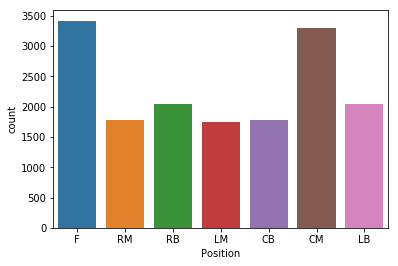

In [45]:
sns.countplot(fifa_data['Position'])

In [46]:
old_features = [
    'SprintSpeed',
    'Acceleration',
    'Finishing',
    'LongShots',
    'ShotPower',
    'Positioning',
    'Penalties',
    'Volleys',
    'ShortPassing',
    'Vision',
    'Crossing',
    'LongPassing',
    'Curve',
    'FKAccuracy',
    'Marking',
    'StandingTackle',
    'Interceptions',
    'LongPassing',
    'HeadingAccuracy',
    'SlidingTackle',
    'Strength',
    'Stamina',
    'Aggression',
    'Jumping',
    'Dribbling',
    'BallControl',
    'Agility',
    'Balance',
    'Reactions',
]

In [47]:
fifa_data.columns

Index(['Age', 'Overall', 'Potential', 'Preferred Foot', 'Weak Foot',
       'Work Rate', 'Body Type', 'Position', 'Height', 'Weight', 'LS', 'ST',
       'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM',
       'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB',
       'RCB', 'RB', 'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing',
       'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing',
       'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions',
       'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'StandingTackle', 'SlidingTackle'],
      dtype='object')

In [48]:
pace = fifa_data['SprintSpeed'] * 0.55 + fifa_data['Acceleration'] * 0.45

shooting = fifa_data['Finishing'] * 0.45 + \
           fifa_data['LongShots'] * 0.2 + \
           fifa_data['ShotPower'] * 0.2 + \
           fifa_data['Positioning'] * 0.05 + \
           fifa_data['Penalties'] * 0.05 + \
           fifa_data['Volleys'] * 0.05

passing =  fifa_data['ShortPassing'] * 0.35 + \
           fifa_data['Vision'] * 0.2 + \
           fifa_data['Crossing'] * 0.2 + \
           fifa_data['LongPassing'] * 0.15 + \
           fifa_data['Curve'] * 0.05 + \
           fifa_data['FKAccuracy'] * 0.05

dribbling = fifa_data['Dribbling'] * 0.5 + \
           fifa_data['BallControl'] * 0.3 + \
           fifa_data['Agility'] * 0.1 + \
           fifa_data['Balance'] * 0.05 + \
           fifa_data['Reactions'] * 0.05

deffending = fifa_data['Marking'] * 0.3 + \
           fifa_data['StandingTackle'] * 0.3 + \
           fifa_data['Interceptions'] * 0.2 + \
           fifa_data['HeadingAccuracy'] * 0.1 + \
           fifa_data['SlidingTackle'] * 0.1

physical = fifa_data['Strength'] * 0.5 + \
           fifa_data['Stamina'] * 0.25 + \ 
           fifa_data['Aggression'] * 0.2 + \
           fifa_data['Jumping'] * 0.05 

In [49]:
fifa_data['Pace'] = pace
fifa_data['Shooting'] = shooting
fifa_data['Passing'] = passing
fifa_data['Dribbling'] = dribbling
fifa_data['Deffending'] = deffending
fifa_data['Physical'] = physical
fifa_data.drop('Preferred Foot', axis=1)

,Age,Overall,Potential,Weak Foot,Work Rate,Body Type,Position,Height,Weight,LS,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,Pace,Shooting,Passing,Deffending,Physical
0,31,94,94,4.0,Medium/ Medium,Normal,F,170.18,72.11,88,...,75.0,96.0,33.0,28.0,26.0,88.25,91.30,89.50,32.3,60.50
1,33,94,94,4.0,High/ Low,Normal,F,187.96,82.99,91,...,85.0,95.0,28.0,31.0,23.0,90.10,93.25,80.95,34.7,78.85
2,26,92,93,5.0,High/ Medium,Normal,F,175.26,68.03,84,...,81.0,94.0,27.0,24.0,33.0,91.80,84.25,83.05,32.0,59.00
3,27,91,92,5.0,High/ High,Normal,RM,180.34,69.84,82,...,79.0,88.0,68.0,58.0,51.0,76.90,85.70,91.65,60.6,78.35
4,27,91,91,4.0,High/ Medium,Normal,F,172.72,73.92,83,...,86.0,91.0,34.0,27.0,22.0,90.70,82.85,85.70,34.8,67.35
5,32,91,91,4.0,High/ High,Lean,RM,172.72,66.21,77,...,82.0,84.0,60.0,76.0,73.0,75.60,76.45,89.50,70.2,67.05
6,31,91,91,4.0,High/ Medium,Normal,F,182.88,86.17,87,...,85.0,85.0,62.0,45.0,38.0,79.95,89.30,79.00,51.8,84.85
7,32,91,91,3.0,High/ Medium,Normal,RB,182.88,82.09,73,...,75.0,82.0,87.0,92.0,91.0,75.45,64.65,71.95,89.9,84.75
8,29,90,90,4.0,High/ Medium,Normal,F,182.88,79.82,87,...,88.0,86.0,34.0,42.0,19.0,77.55,88.75,74.75,41.0,81.70
9,28,90,90,5.0,Medium/ Medium,Normal,LM,182.88,76.19,78,...,73.0,85.0,72.0,79.0,69.0,62.90,81.70,89.45,74.0,68.75


In [50]:
fifa_data.drop(columns=old_features, inplace=True)

In [51]:
fifa_data.columns

Index(['Age', 'Overall', 'Potential', 'Preferred Foot', 'Weak Foot',
       'Work Rate', 'Body Type', 'Position', 'Height', 'Weight', 'LS', 'ST',
       'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM',
       'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB',
       'RCB', 'RB', 'Composure', 'Pace', 'Shooting', 'Passing', 'Deffending',
       'Physical'],
      dtype='object')

In [52]:
def find_duplicate_columns(data):
    no_duplicates_data = data.T.drop_duplicates(keep='first').T
    return [c for c in data.columns if c not in no_duplicates_data.columns]

In [53]:
duplicate_columns = find_duplicate_columns(fifa_data)
duplicate_columns

['ST',
 'RS',
 'CF',
 'RF',
 'RW',
 'CAM',
 'RAM',
 'CM',
 'RCM',
 'RM',
 'CDM',
 'RDM',
 'RWB',
 'CB',
 'RCB',
 'RB']

In [54]:
fifa_data.drop(columns=duplicate_columns, inplace=True)

In [55]:
fifa_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16122 entries, 0 to 16121
Data columns (total 26 columns):
Age               16122 non-null int64
Overall           16122 non-null int64
Potential         16122 non-null int64
Preferred Foot    16122 non-null object
Weak Foot         16122 non-null float64
Work Rate         16122 non-null object
Body Type         16122 non-null object
Position          16122 non-null object
Height            16122 non-null float64
Weight            16122 non-null float64
LS                16122 non-null int64
LW                16122 non-null int64
LF                16122 non-null int64
LAM               16122 non-null int64
LM                16122 non-null int64
LCM               16122 non-null int64
LWB               16122 non-null int64
LDM               16122 non-null int64
LB                16122 non-null int64
LCB               16122 non-null int64
Composure         16122 non-null float64
Pace              16122 non-null float64
Shooting          1

In [56]:
fifa_data['Position'] = fifa_data['Position'].astype(str)
fifa_data['Position'].unique()

array(['F', 'RM', 'RB', 'LM', 'CB', 'CM', 'LB'], dtype=object)

In [57]:
from sklearn.preprocessing import LabelEncoder

def encode_labels(col):
    label_encoder = LabelEncoder()
    transform = label_encoder.fit_transform(col)
    print(f'{col.name} encoding {get_labels_map(label_encoder)}')
    return transform

def get_labels_map(le):
    return dict(zip(le.classes_, le.transform(le.classes_)))


fifa_categories = fifa_data.select_dtypes('object')
fifa_data[fifa_categories.columns] = fifa_data[fifa_categories.columns].apply(encode_labels)

Preferred Foot encoding {'Left': 0, 'Right': 1}
Preferred Foot encoding {'Left': 0, 'Right': 1}
Work Rate encoding {'High/ High': 0, 'High/ Low': 1, 'High/ Medium': 2, 'Low/ High': 3, 'Low/ Low': 4, 'Low/ Medium': 5, 'Medium/ High': 6, 'Medium/ Low': 7, 'Medium/ Medium': 8}
Body Type encoding {'Lean': 0, 'Normal': 1, 'Stocky': 2}
Position encoding {'CB': 0, 'CM': 1, 'F': 2, 'LB': 3, 'LM': 4, 'RB': 5, 'RM': 6}


In [58]:
from imblearn.over_sampling import BorderlineSMOTE
blsmote = BorderlineSMOTE()
sampler = blsmote
X_resampled, y_resampled = sampler.fit_resample(fifa_data.drop('Position', axis=1), fifa_data['Position'])

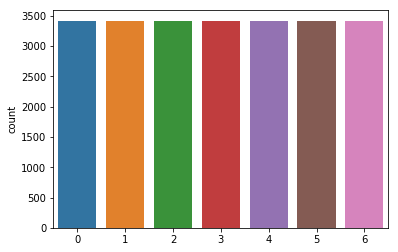

In [59]:
sns.countplot(y_resampled)

In [60]:
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.33, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(
        X_train, y_train, test_size=0.25, random_state=42)

scaler = RobustScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled =  scaler.transform(X_test)
X_val_scaled = scaler.transform(X_val)

In [61]:
# from sklearn.model_selection import GridSearchCV

from hypopt import GridSearch  # provide posibility for search with validation set
from sklearn.ensemble import RandomForestClassifier

n_features = X_train_scaled.shape[1]
max_features = int(np.sqrt(n_features))

param_grid = {
    'bootstrap': [True],
    'max_depth': [50],
    'max_features': [6 ,7],
    'min_samples_leaf': [1],
    'min_samples_split': [2],
    'n_estimators': [1000]
}

rf = RandomForestClassifier()

grid_search = GridSearch(model = rf, param_grid = param_grid, num_threads=1)

In [62]:
grid_search.fit(X_train_scaled, y_train, X_val_scaled, y_val)

100%|██████████| 2/2 [01:25<00:00, 42.97s/it]


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=50, max_features=6, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [63]:
from sklearn.metrics import classification_report

print(grid_search.best_params)
print(classification_report(grid_search.best_estimator_.predict(X_test_scaled), y_test))

{'bootstrap': True, 'max_depth': 50, 'max_features': 6, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 1000}
              precision    recall  f1-score   support

           0       0.88      0.72      0.79      1408
           1       0.65      0.64      0.65      1163
           2       0.80      0.81      0.81      1117
           3       0.74      0.83      0.78      1013
           4       0.60      0.66      0.63      1025
           5       0.79      0.77      0.78      1167
           6       0.61      0.66      0.63      1003

    accuracy                           0.73      7896
   macro avg       0.73      0.73      0.72      7896
weighted avg       0.73      0.73      0.73      7896

